In [ ]:
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras.models as km
from keras.models import Sequential
from keras import activations, initializers, regularizers, constraints
from keras.layers import Dense, Activation
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/winequality-red.csv")

In [ ]:
df.shape

(1599, 12)

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
pd.isnull(df).sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
df['fixed acidity']=df['fixed acidity'].astype('int')

In [ ]:
df['fixed acidity'].dtypes

dtype('int64')

In [ ]:
df.rename(columns={'residual sugar':'sugar'})

,fixed acidity,volatile acidity,citric acid,sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


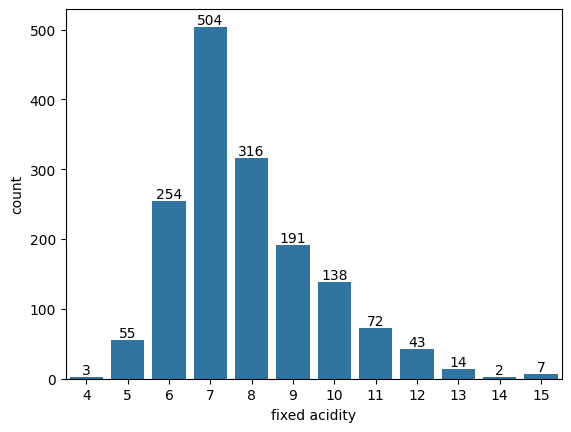

In [ ]:
ax=sns.countplot(x='fixed acidity',data=df)
for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='fixed acidity', ylabel='quality'>

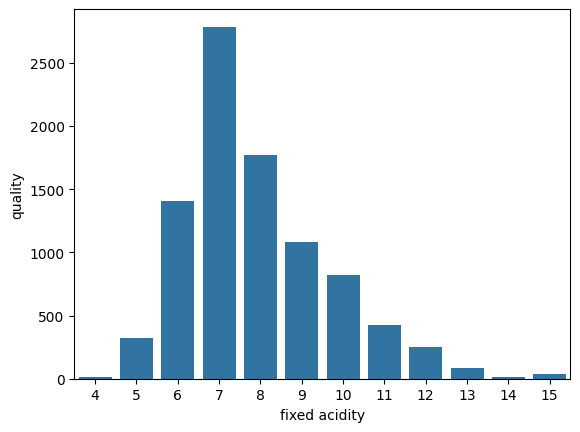

In [ ]:
sale_gen=df.groupby(['fixed acidity'],as_index=False)['quality'].sum().sort_values(by='quality',ascending=False)
sns.barplot(x='fixed acidity',y='quality',data=sale_gen)

<Axes: xlabel='quality', ylabel='pH'>

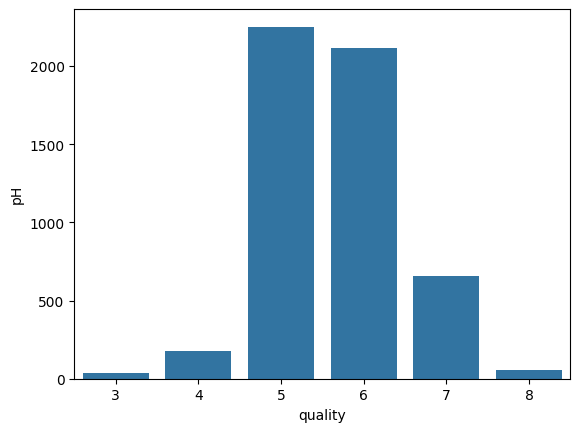

In [ ]:
sale_gen=df.groupby(['quality'],as_index=False)['pH'].sum().sort_values(by='pH',ascending=False)
sns.barplot(x='quality',y='pH',data=sale_gen)

<Axes: xlabel='quality', ylabel='volatile acidity'>

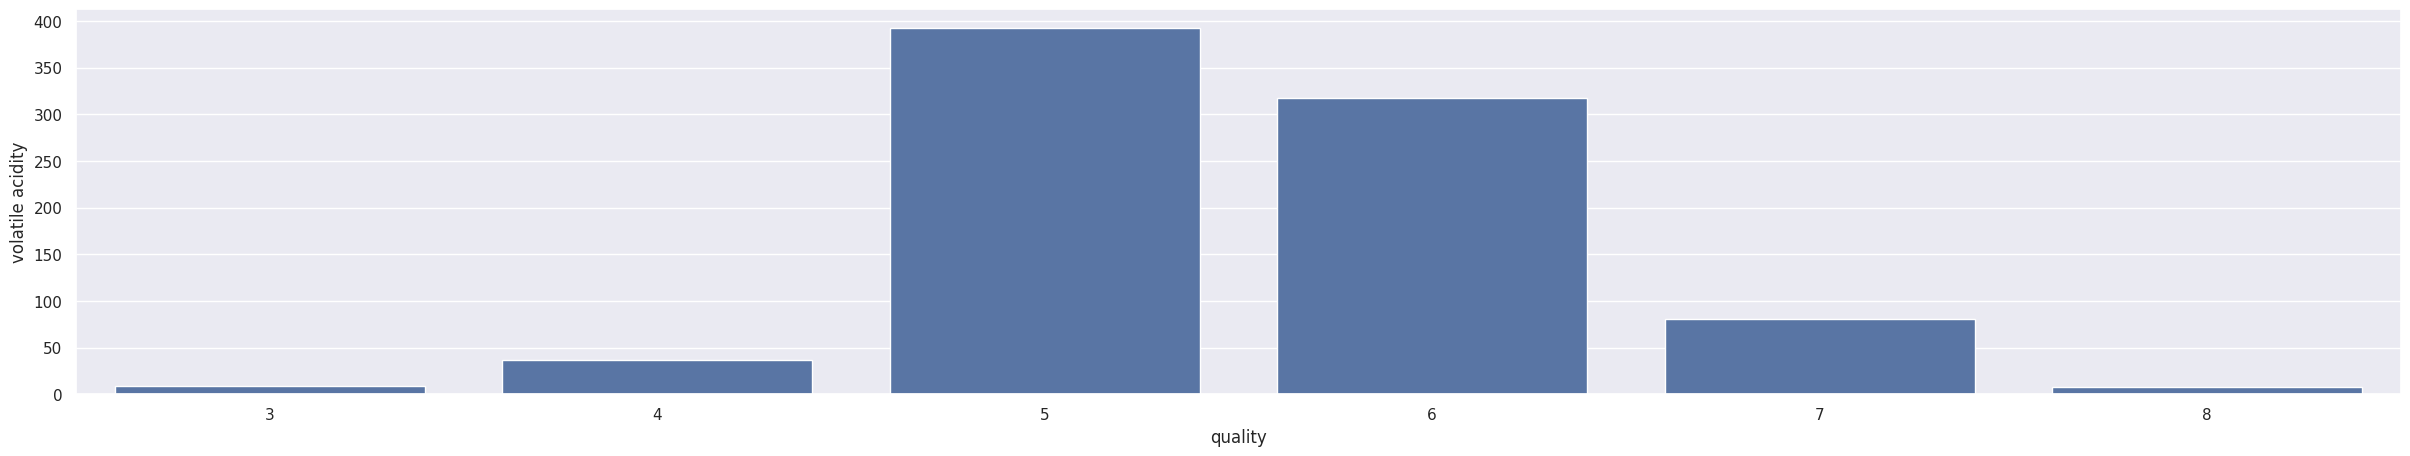

In [ ]:
sale_gen=df.groupby(['quality'],as_index=False)['volatile acidity'].sum().sort_values(by='volatile acidity',ascending=False)
sns.barplot(x='quality',y='volatile acidity',data=sale_gen)

<Axes: xlabel='quality', ylabel='citric acid'>

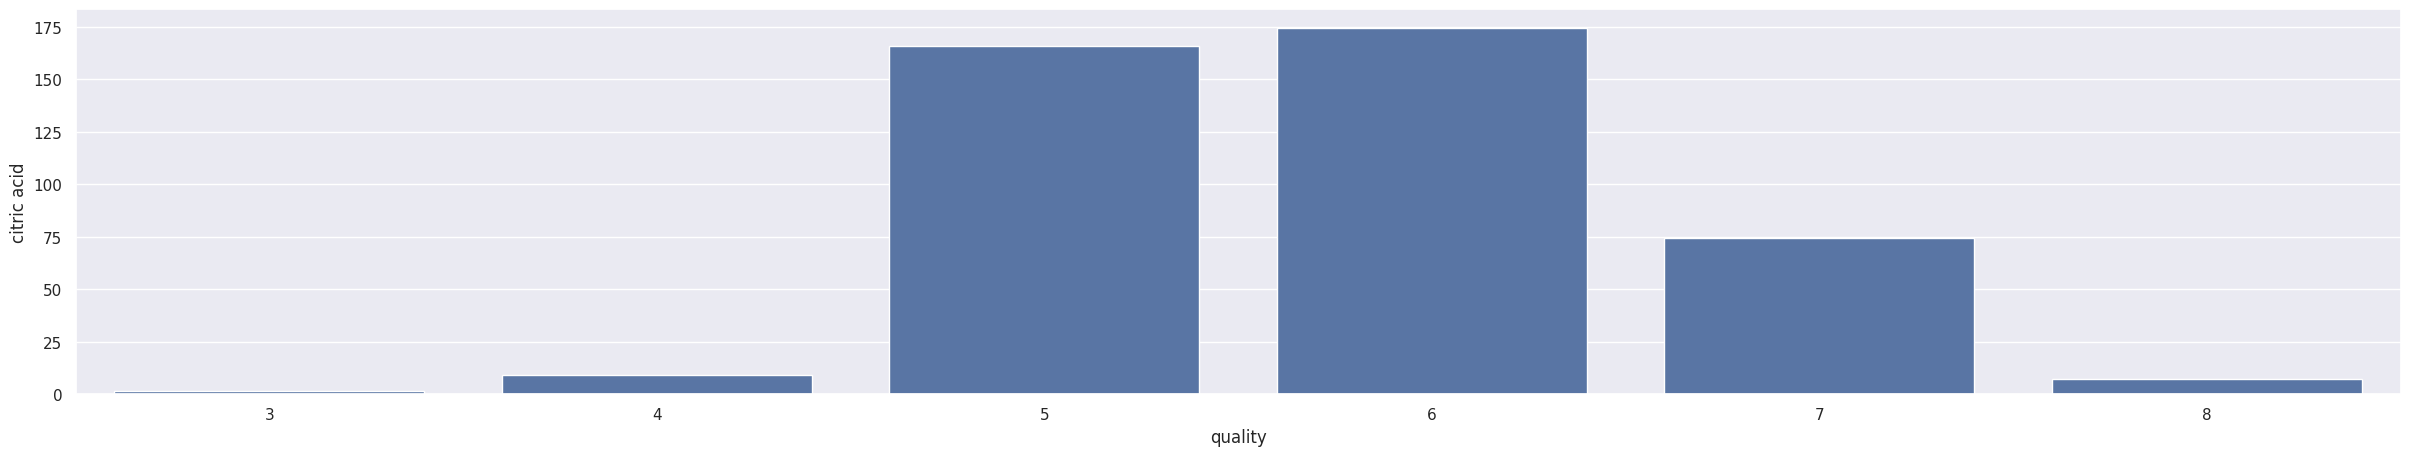

In [ ]:
sale_gen=df.groupby(['quality'],as_index=False)['citric acid'].sum().sort_values(by='citric acid',ascending=False)
sns.barplot(x='quality',y='citric acid',data=sale_gen)

<Axes: xlabel='quality', ylabel='residual sugar'>

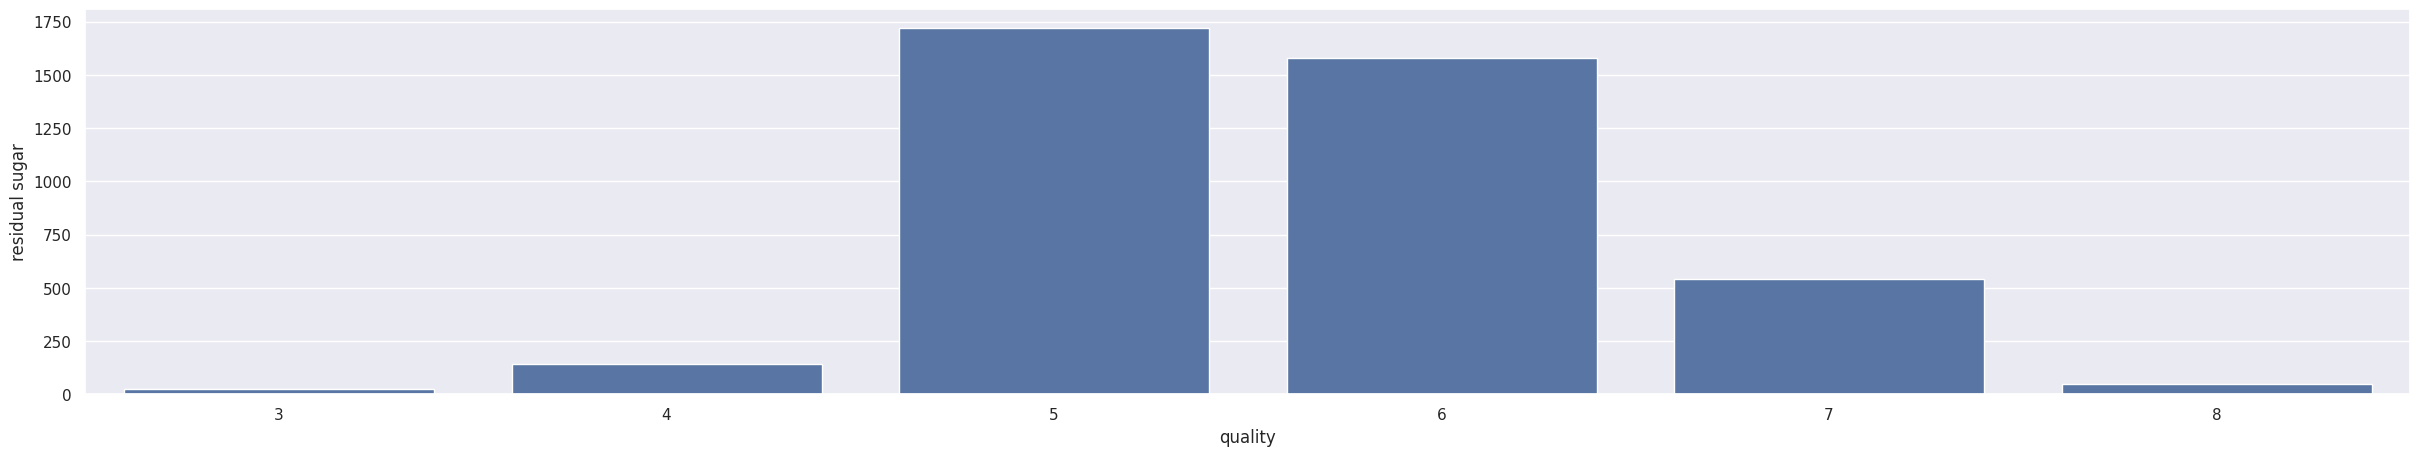

In [ ]:
sale_gen=df.groupby(['quality'],as_index=False)['residual sugar'].sum().sort_values(by='residual sugar',ascending=False)
sns.barplot(x='quality',y='residual sugar',data=sale_gen)

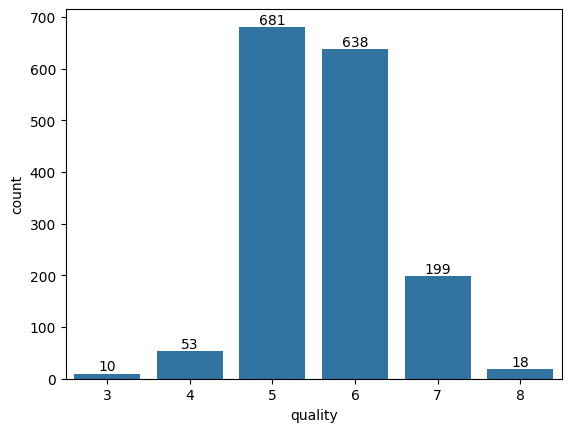

In [ ]:
ax=sns.countplot(x='quality',data=df)
for bars in ax.containers:
  ax.bar_label(bars)

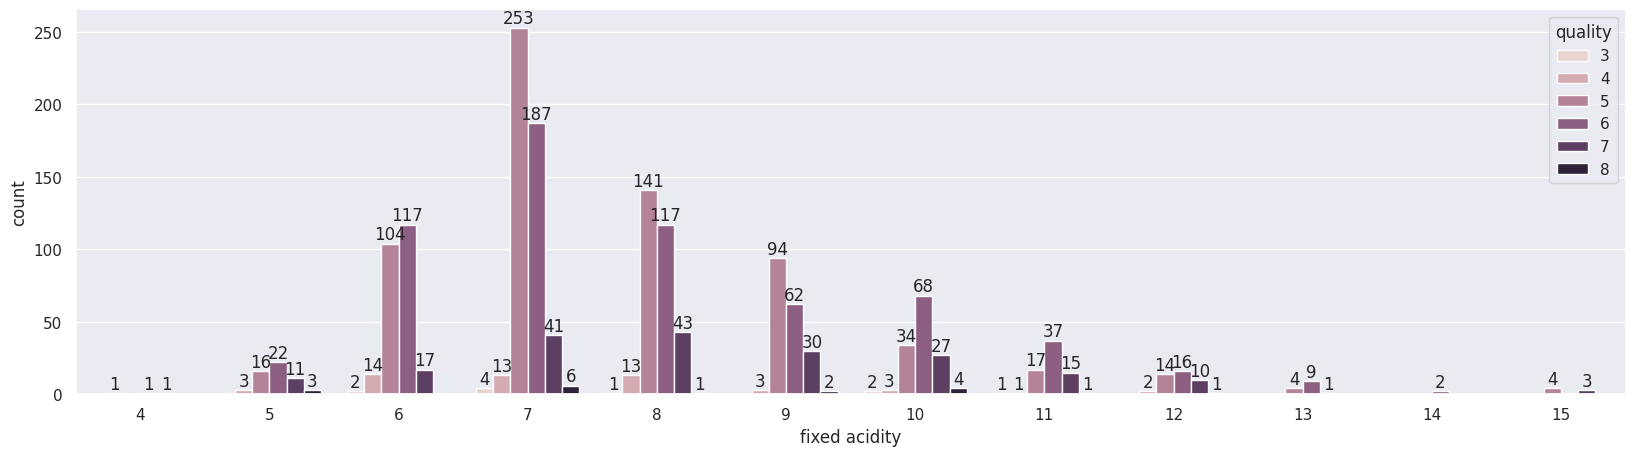

In [ ]:
ax=sns.countplot(data=df,x='fixed acidity',hue='quality')
sns.set(rc={'figure.figsize':(30,5)})
for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='alcohol', ylabel='pH'>

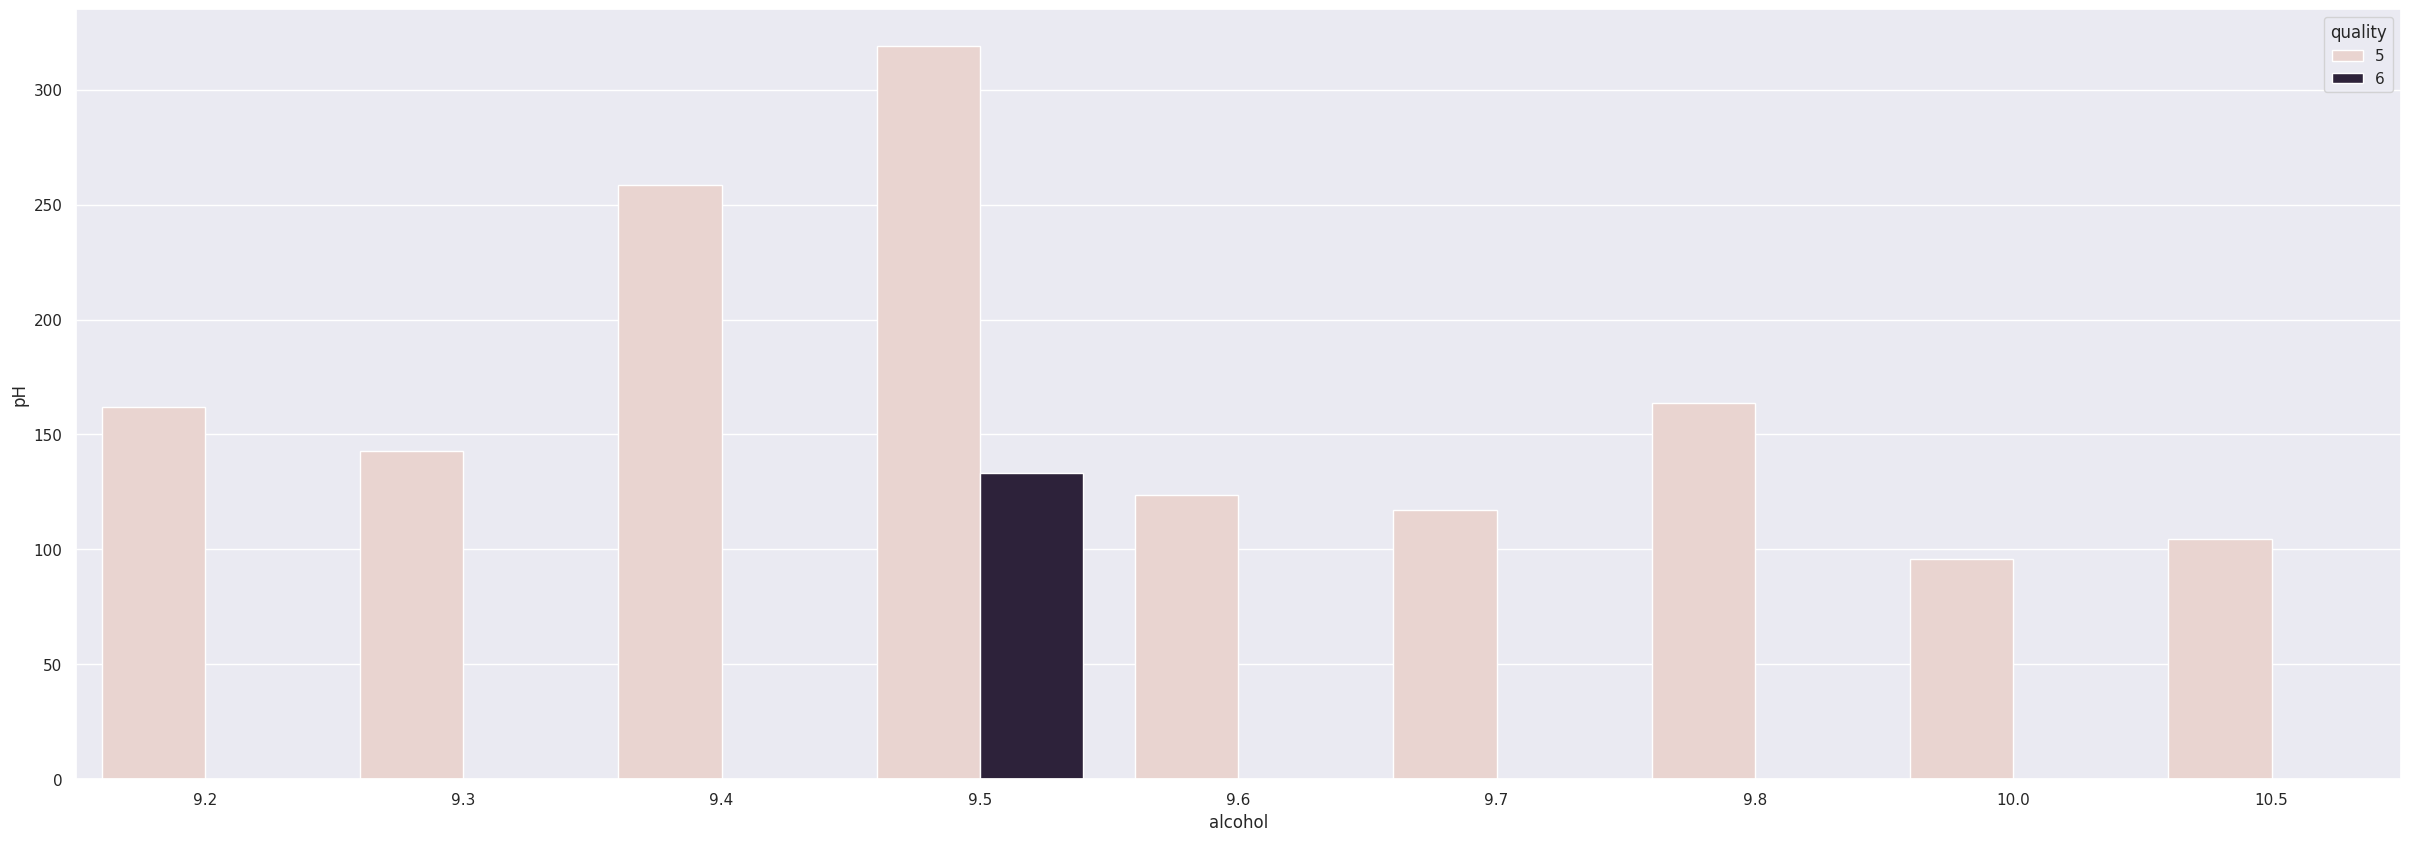

In [ ]:
sale_state=df.groupby(['alcohol','quality'],as_index=False)['pH'].sum().sort_values(by='pH',ascending=False).head(10)
sns.set(rc={'figure.figsize':(30,10)})
sns.barplot(x='alcohol',y='pH',data=sale_state,hue='quality')

In [ ]:
df["quality"].value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


In [ ]:
X=df.drop(columns=["quality"])
y=df['quality']

In [ ]:
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.3,random_state=123)

In [ ]:
train_X.shape

(1119, 11)

In [ ]:
model=Sequential()
model.add(Dense(units=11,kernel_initializer='uniform',activation='relu',input_dim=11))
model.add(Dense(units=6,kernel_initializer='uniform',activation='relu'))
model.add(Dense(units=4,kernel_initializer='uniform',activation='relu'))
model.add(Dense(units=1,kernel_initializer='uniform',activation='linear'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            28 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 237 (948.00 B)

 Trainable params: 237 (948.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
print(train_X.shape)
print(train_y.shape)

(1119, 11)
(1119,)


In [ ]:
model.fit(train_X,train_y,epochs=50,batch_size=32,validation_split=0.1)
mse=model.evaluate(test_X,test_y)
print(f'Test Mean Squared Error:{mse}')

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 31.5074 - val_loss: 33.1524
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 31.6828 - val_loss: 30.6894
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 26.9128 - val_loss: 20.4288
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14.6834 - val_loss: 6.5064
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.8494 - val_loss: 5.4141
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.2777 - val_loss: 4.8295
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.4937 - val_loss: 4.3139
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.9515 - val_loss: 3.6792
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.3825 - val_loss: 3.1383
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.7278 - val_loss: 2.5667
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.3544 - val_loss: 2.0831
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7735 

In [ ]:
predictions=model.predict(test_X)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
predictions

array([[6.484274 ],
       [5.1479406],
       [5.1720467],
       [6.124568 ],
       [5.239031 ],
       [5.562834 ],
       [5.935964 ],
       [5.5469484],
       [5.512348 ],
       [5.714952 ],
       [4.991333 ],
       [6.724277 ],
       [5.5268   ],
       [5.761915 ],
       [5.9391117],
       [6.215526 ],
       [5.1410074],
       [5.9254656],
       [5.8316135],
       [5.335185 ],
       [5.70325  ],
       [5.5268   ],
       [5.6904745],
       [5.240511 ],
       [5.3146057],
       [5.3558445],
       [5.9541636],
       [5.6627464],
       [5.953137 ],
       [5.6861315],
       [4.9746594],
       [6.1442137],
       [5.340146 ],
       [5.1510563],
       [6.145832 ],
       [4.975354 ],
       [5.5912037],
       [6.0161314],
       [5.3018236],
       [5.1960025],
       [5.5321207],
       [5.9417753],
       [6.0240593],
       [5.6318583],
       [5.4686375],
       [5.312884 ],
       [5.516672 ],
       [5.1023693],
       [5.673904 ],
       [5.598443 ],
